## Merging data from multiple sources

To determine other metrics like test per million, cases per million, etc., we require some more information about the country, viz. its population. Let's download another file `locations.csv` that contains health-related information for many countries, including Italy.

## 合并来自多个来源的数据
为了确定每百万检测数、每百万病例数等其他指标，我们需要关于这个国家的更多信息，即其人口。让我们下载另一个文件“locations.csv”，它包含许多国家的健康相关信息，包括意大利。

In [5]:
from urllib.request import urlretrieve
urlretrieve('https://gist.githubusercontent.com/aakashns/8684589ef4f266116cdce023377fc9c8/raw/99ce3826b2a9d1e6d0bde7e9e559fc8b6e9ac88b/locations.csv', 
            'locations.csv')

('locations.csv', <http.client.HTTPMessage at 0x1291d6360>)

In [6]:
import pandas as pd
locations_df = pd.read_csv('locations.csv')

In [7]:
locations_df

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,3.892834e+07,64.83,0.500,1803.987
1,Albania,Europe,2.877800e+06,78.57,2.890,11803.431
2,Algeria,Africa,4.385104e+07,76.88,1.900,13913.839
3,Andorra,Europe,7.726500e+04,83.73,NaN,NaN
4,Angola,Africa,3.286627e+07,61.15,NaN,5819.495
...,...,...,...,...,...,...
207,Yemen,Asia,2.982597e+07,66.12,0.700,1479.147
208,Zambia,Africa,1.838396e+07,63.89,2.000,3689.251
209,Zimbabwe,Africa,1.486293e+07,61.49,1.700,1899.775
210,World,NaN,7.794799e+09,72.58,2.705,15469.207


We can merge this data into our existing data frame by adding more columns. However, to merge two data frames, we need at least one common column. Let's insert a `location` column in the `covid_df` dataframe with all values set to `"Italy"`.

我们可以通过添加更多列将此数据合并到我们现有的数据框中。然而，要合并两个数据框，我们至少需要一个共同的列。让我们在“covid_df”数据框中插入一个“location”列，并将所有值都设置为“意大利”。

In [12]:
locations_df[locations_df.location == "Italy"] #locations_df[布尔条件] 会根据布尔条件筛选 locations_df，只保留条件为 True 的行。

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
97,Italy,Europe,60461828.0,83.51,3.18,35220.084


In [47]:
covid_df = pd.read_csv('italy-covid-daywise.csv')
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
covid_df['total_tests'] = covid_df.new_tests.cumsum() ####### 后面画 阳性检测率 要用
covid_df['location'] = "Italy"

- covid_df['total_cases'] = covid_df.new_cases.cumsum()
- covid_df['total_deaths'] = covid_df.new_deaths.cumsum()作用是：
    - 为 covid_df DataFrame 添加两列 total_cases 和 total_deaths，分别用于计算 累计确诊病例数 和 累计死亡病例数。

covid_df['location'] = "Italy" 的作用是将：
- covid_df DataFrame 中名为 location 列的所有值全部修改为字符串 “Italy”。
- 如果 covid_df 中还没有 location 这一列，该操作会创建一个新的 location 列，并将所有行的值都设置为 “Italy”。

In [46]:
covid_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,location
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,Italy
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,Italy
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,Italy
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,Italy
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,Italy
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0,Italy
244,2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0,Italy
245,2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0,Italy
246,2020-09-02,975.0,8.0,NaN,270189.0,35491.0,NaN,Italy


We can now add the columns from `locations_df` into `covid_df` using the `.merge 合并` method.

我们现在可以使用“.merge”方法将“locations_df”中的列添加到“covid_df”中。

In [48]:
merged_df = covid_df.merge(locations_df, on="location")

In [49]:
merged_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
244,2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
245,2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084
246,2020-09-02,975.0,8.0,NaN,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084


The location data for Italy is appended to each row within `covid_df`. If the `covid_df` data frame contained data for multiple locations, then the respective country's location data would be appended for each row.

We can now calculate metrics like cases per million and deaths per million.

意大利的位置数据被添加到`covid_df`中的每一行。如果`covid_df`数据框包含多个位置的数据，那么相应国家的位置数据将被添加到每一行。我们现在可以计算每百万人口的病例数和每百万人口的死亡数等指标。

In [50]:
merged_df['cases_per_million'] = merged_df.total_cases * 1e6 / merged_df.population  # total_cases 变量 ； population = 60461828.0

In [51]:
merged_df['deaths_per_million'] = merged_df.total_deaths * 1e6 / merged_df.population

In [52]:
merged_df

,date,new_cases,new_deaths,new_tests,total_cases,total_deaths,total_tests,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,cases_per_million,deaths_per_million
0,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000
1,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000
2,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000
3,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000
4,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,266853.0,35473.0,4182478.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4413.578101,586.700753
244,2020-08-31,1365.0,4.0,42583.0,268218.0,35477.0,4225061.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4436.154329,586.766910
245,2020-09-01,996.0,6.0,54395.0,269214.0,35483.0,4279456.0,Italy,Europe,60461828.0,83.51,3.18,35220.084,4452.627532,586.866146
246,2020-09-02,975.0,8.0,NaN,270189.0,35491.0,NaN,Italy,Europe,60461828.0,83.51,3.18,35220.084,4468.753409,586.998461


## Writing data back to files

After completing your analysis and adding new columns, you should write the results back to a file. Otherwise, the data will be lost when the Jupyter notebook shuts down. Before writing to file, let us first create a data frame containing just the columns we wish to record.

## 将数据写回文件
在完成分析并添加新列后，你应该将结果写回到文件中。否则，当 Jupyter 笔记本关闭时，数据将会丢失。在写入文件之前，让我们先创建一个仅包含我们希望记录的列的数据框。

In [55]:
result_df = merged_df[['date',
                       'new_cases', 
                       'total_cases', 
                       'new_deaths', 
                       'total_deaths', 
                       'new_tests', 
                       'total_tests',
                       'cases_per_million', 
                       'deaths_per_million']]

In [56]:
result_df

,date,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million
0,2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
1,2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
2,2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
3,2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
4,2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,4182478.0,4413.578101,586.700753
244,2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,4225061.0,4436.154329,586.766910
245,2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,4279456.0,4452.627532,586.866146
246,2020-09-02,975.0,270189.0,8.0,35491.0,NaN,NaN,4468.753409,586.998461


To write the data from the data frame into a file, we can use the `to_csv` function. 

要将数据框中的数据写入文件，我们可以使用“to_csv”函数。

In [58]:
result_df.to_csv('results.csv', index=None)

The `to_csv` function also includes an additional column for storing the index of the dataframe by default. We pass `index=None` to turn off this behavior. We can now verify that the `results.csv` is created and contains data from the data frame in CSV format:


`“to_csv”`函数默认情况下还包括一个额外的列用于存储数据框的索引。我们传入`“index=None”`来关闭此行为。现在我们可以验证`“results.csv”`已创建并且以 CSV 格式包含来自数据框的数据。

- result_df：
	- result_df 是一个 pandas DataFrame 对象，通常用于存储表格数据。该 DataFrame 可能包含多行多列的数据（例如日期、数值、类别等）。
	- .to_csv()：
	- .to_csv() 是 pandas 中的一个方法，用于将 DataFrame 导出为 CSV 文件。
	- 该方法可以指定文件路径、是否包含索引、列分隔符、编码格式等参数。
- 'results.csv'：
	- 'results.csv' 是文件名，它指定了导出 CSV 文件的文件名和路径。
	- `如果您只提供文件名（如 'results.csv'），则文件将被保存在当前工作目录中。`
	- `您也可以指定完整的路径来将文件保存到特定位置，如 'C:/Users/YourName/Desktop/results.csv'。`
- index=None：
	- index 参数用于指定是否将 DataFrame 的行索引（index）写入到 CSV 文件中。
	- index 的默认值是 True，表示将行索引（如 0, 1, 2, …）也写入到 CSV 文件中作为第一列。
	- index=None 的效果与 index=False 相同，表示不将行索引写入 CSV 文件，即在导出的 CSV 文件中不包含 DataFrame 的行索引。


## Bonus: Basic Plotting with Pandas

We generally 通常；一般来说；大体上 use a library 库；图书馆 like `matplotlib` or `seaborn` plot 绘图；情节；图表 graphs 图形；图表 within a Jupyter notebook. However, Pandas dataframes & series provide a handy `.plot` method for quick and easy plotting.
er time.

## 奖励：使用 Pandas 进行基本绘图
我们通常使用像“matplotlib”或“seaborn”这样的库在 Jupyter notebook 中绘制图形。然而，Pandas 的数据框和序列提供了一个方便的“.plot”方法，用于快速简便地绘图。以及其他时间。

Let's plot a line graph showing how the number of daily cases varies ov

让我们绘制一个折线图，展示每日病例数量是如何变化的。

<Axes: >

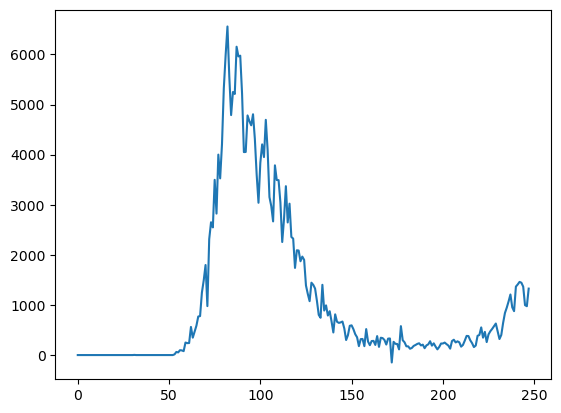

In [59]:
result_df.new_cases.plot()

- result_df：
	- result_df 是一个 pandas DataFrame 对象，通常包含某个数据集（如 Covid-19 的数据）。该数据集可能包含多个列（如 date、new_cases、new_deaths 等）。
- result_df.new_cases：
	- result_df.new_cases 是 pandas 中的一种快捷方式，用于访问 DataFrame 中名为 new_cases 的列。
	- 它的效果与 result_df['new_cases'] 相同，返回一个 Series 对象，该 Series 包含 new_cases 列中的所有数据。
- .plot()：
	- .plot() 是 pandas 中 Series 和 DataFrame 的一个方法，它封装了 matplotlib 库的绘图功能，用于快速绘制图表。
	- .plot() 可以生成多种类型的图表，如折线图、柱状图、散点图、饼图等，默认绘制的是折线图（line plot）。
- .plot() 方法的常见参数包括：
	- kind：指定图表类型（如 'line'、'bar'、'hist'、'pie'、'scatter' 等）。
	- title：设置图表的标题。
	- xlabel 和 ylabel：设置 X 轴和 Y 轴的标签。
	- figsize：指定图表的尺寸（宽度和高度）。
	- color：设置图表中线条、柱子的颜色。
	- grid：设置是否显示网格线（布尔值）。
	- legend：设置是否显示图例（布尔值）。

While this plot shows the overall trend, it's hard to tell where the peak occurred, as there are no dates on the X-axis. We can use the `date` column as the index for the data frame to address this issue.

虽然这个图表显示了总体趋势，但由于 X 轴上没有日期，所以很难确定峰值出现在哪里。我们可以将“日期”列用作数据框的索引来解决这个问题。

In [60]:
result_df.set_index('date', inplace=True)

In [61]:
result_df

,new_cases,total_cases,new_deaths,total_deaths,new_tests,total_tests,cases_per_million,deaths_per_million
date,,,,,,,,
2019-12-31,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
2020-01-01,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
2020-01-02,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
2020-01-03,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
2020-01-04,0.0,0.0,0.0,0.0,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2020-08-30,1444.0,266853.0,1.0,35473.0,53541.0,4182478.0,4413.578101,586.700753
2020-08-31,1365.0,268218.0,4.0,35477.0,42583.0,4225061.0,4436.154329,586.766910
2020-09-01,996.0,269214.0,6.0,35483.0,54395.0,4279456.0,4452.627532,586.866146


- result_df：
	- result_df 是一个 pandas DataFrame 对象，通常用于存储表格数据。该数据集可能包含多列（如 date、new_cases、new_deaths 等）。
- .set_index() 方法：
	- .set_index() 是 pandas 中的一个方法，用于将指定的列设置为 DataFrame 的行索引（index）。
	- 通过将某个列设置为索引，可以使 DataFrame 中的行索引更加有意义（如日期、ID、唯一标识符等），便于后续的数据查找、筛选和操作。
- 'date'：
	- 'date' 是 result_df 中的一列名，表示要将 date 列设置为行索引。
	- set_index() 会将 date 列中的值用作 DataFrame 的新行索引，从而替代原来的默认行索引（如 0, 1, 2, …）。
- inplace=True：
	- inplace 参数是一个布尔值，默认值为 False。
	- inplace=False（默认值）表示 set_index() 会返回一个新的 DataFrame，而不会修改原始的 result_df。
	- inplace=True 表示直接在原始 DataFrame result_df 上进行操作，不会创建新的 DataFrame，而是将 date 列设置为 result_df 的行索引并修改原始 DataFrame。

Notice that the index of a data frame doesn't have to be numeric. Using the date as the index also allows us to get the data for a specific data using `.loc`.

请注意，数据框的索引不一定是数字。将日期用作索引还允许我们使用“.loc”获取特定数据的数据。

In [62]:
result_df.loc['2020-09-01']

new_cases             9.960000e+02
total_cases           2.692140e+05
new_deaths            6.000000e+00
total_deaths          3.548300e+04
new_tests             5.439500e+04
total_tests           4.279456e+06
cases_per_million     4.452628e+03
deaths_per_million    5.868661e+02
Name: 2020-09-01, dtype: float64

Let's plot the new cases & new deaths per day as line graphs.

让我们将每日新增病例和新增死亡人数绘制成折线图。

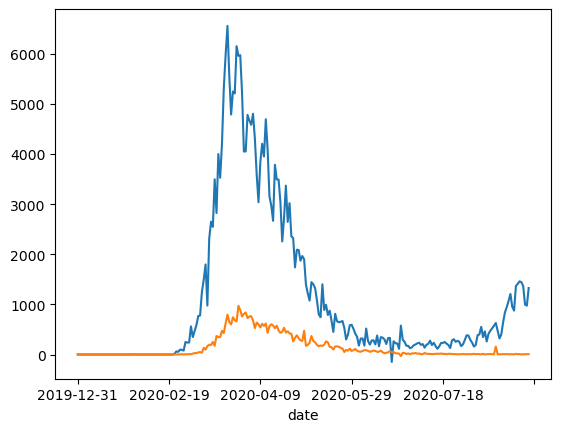

In [63]:
result_df.new_cases.plot()
result_df.new_deaths.plot();

We can also compare the total cases vs. total deaths.

我们也可以比较总病例数与总死亡人数。

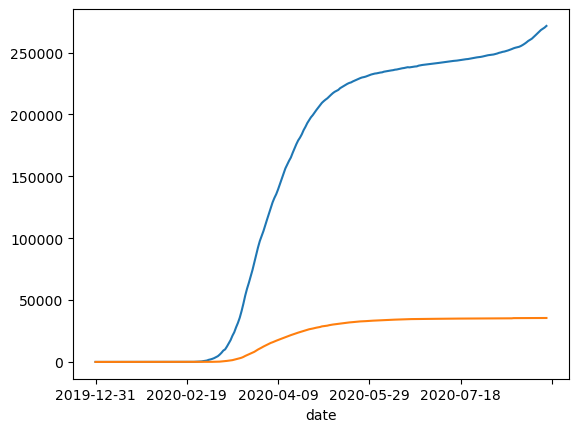

In [64]:
result_df.total_cases.plot()
result_df.total_deaths.plot();

Let's see how the death rate and positive testing rates vary over time.

让我们看看死亡率和阳性检测率如何随时间变化。

In [65]:
death_rate = result_df.total_deaths / result_df.total_cases #死亡率

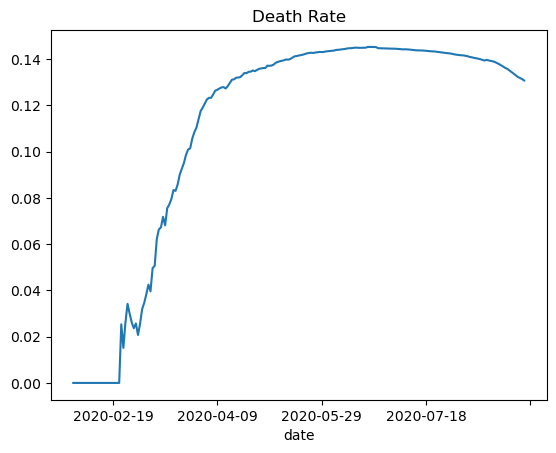

In [66]:
death_rate.plot(title='Death Rate');

<Axes: title={'center': 'Positive Rate'}, xlabel='date'>

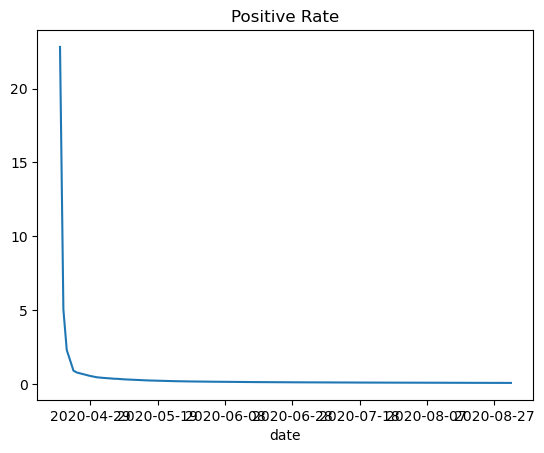

In [67]:
positive_rates = result_df.total_cases / result_df.total_tests #阳性检测率
positive_rates.plot(title='Positive Rate')

Finally, let's plot some month-wise data using a bar chart to visualize the trend at a higher level.

最后，让我们使用条形图绘制一些按月的数据，以便在更高层次上可视化趋势。

In [73]:
import pandas as pd
covid_df = pd.read_csv('italy-covid-daywise.csv')
total_cases = covid_df.new_cases.sum()  #新增报告病例总数
total_deaths = covid_df.new_deaths.sum() #死亡报告病例总数

In [74]:
covid_df['date'] = pd.to_datetime(covid_df.date)

In [75]:
covid_df['month'] = pd.DatetimeIndex(covid_df.date).month

In [76]:
covid_month_df = covid_df.groupby('month')[['new_cases', 'new_deaths', 'new_tests']].sum()

<Axes: xlabel='month'>

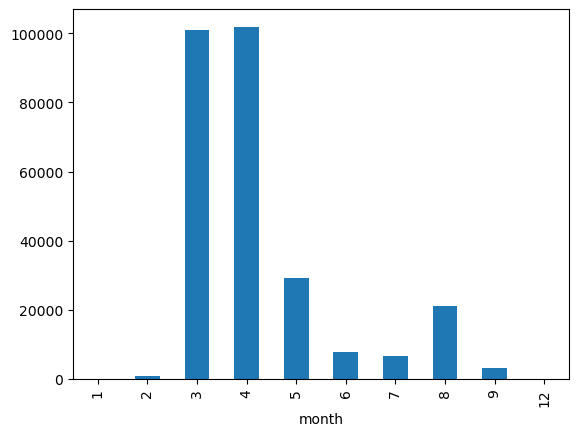

In [77]:
covid_month_df.new_cases.plot(kind='bar')

<Axes: xlabel='month'>

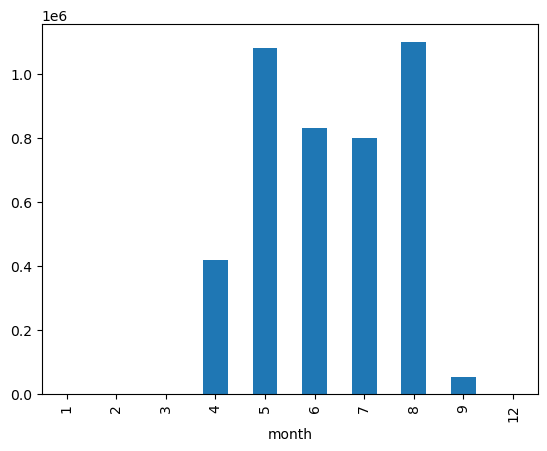

In [78]:
covid_month_df.new_tests.plot(kind='bar')

We've covered the following topics in this lecture:

- Reading a CSV file into a Pandas data frame
- Retrieving data from Pandas data frames
- Querying, soring, and analyzing data
- Merging, grouping, and aggregation of data
- Extracting useful information from dates
- Basic plotting using line and bar charts
- Writing data frames to CSV files

在本次讲座中，我们涵盖了以下主题：
- 将 CSV 文件读入 Pandas 数据框。
- 从 Pandas 数据框中检索数据。
- 查询、排序和分析数据。
- 合并、分组和聚合数据。
- 从日期中提取有用信息。
- 使用折线图和柱状图进行基本绘图。
- 将数据框写入 CSV 文件。

Check out the following resources to learn more about Pandas:

* User guide for Pandas: https://pandas.pydata.org/docs/user_guide/index.html
* Python for Data Analysis (book by Wes McKinney - creator of Pandas): https://www.oreilly.com/library/view/python-for-data/9781491957653/

You are ready to move on to the next lecture:Data Visualization using Matplotlib & Seaborn


查看以下资源以了解有关 Pandas 的更多信息：
* Pandas 用户指南：https://pandas.pydata.org/docs/user_guide/index.html
* 《利用 Python 进行数据分析》（Wes McKinney——Pandas 的创建者所著书籍）：https://www.oreilly.com/library/view/python-for-data/9781491957653/
你已准备好继续学习下一堂课：使用 Matplotlib 和 Seaborn 进行数据可视化。

## Questions for Revision

Try answering the following questions to test your understanding of the topics covered in this notebook:

1. What is Pandas? What makes it useful?
2. How do you install the Pandas library?
3. How do you import the `pandas` module?
4. What is the common alias 常用别名 used while importing the `pandas` module?
5. How do you read a CSV file using Pandas? Give an example?
6. What are some other file formats you can read using Pandas? Illustrate with examples.
7. What are Pandas dataframes? 
8. How are Pandas dataframes `Pandas 数据框` different from Numpy arrays `NumPy 数组`?
9. How do you find the number of rows and columns in a dataframe?
10. How do you get the list of columns in a dataframe?
11. What is the purpose of the `describe` method of a dataframe?
12. How are the `info` and `describe` dataframe methods different?
13. Is a Pandas dataframe conceptually similar to a list of dictionaries or a dictionary of lists? Explain with an example.
14. What is a Pandas `Series`? How is it different from a Numpy array?
15. How do you access a column from a dataframe?
16. How do you access a row from a dataframe?
17. How do you access an element at a specific row & column of a dataframe?
18. How do you create a subset of a dataframe with a specific set of columns?
19. How do you create a subset of a dataframe with a specific range of rows?
20. Does changing a value within a dataframe affect other dataframes created using a subset of the rows or columns? Why is it so?
21. How do you create a copy of a dataframe?
22. Why should you avoid creating too many copies of a dataframe?
23. How do you view the first few rows of a dataframe?
24. How do you view the last few rows of a dataframe?
25. How do you view a random selection of rows of a dataframe?
26. What is the "index" in a dataframe? How is it useful?
27. What does a `NaN` value in a Pandas dataframe represent?
28. How is `Nan` different from `0`?
29. How do you identify the first non-empty row in a Pandas series or column?
30. What is the difference between `df.loc` and `df.at`?
31. Where can you find a full list of methods supported by Pandas `DataFrame` and `Series` objects?
32. How do you find the sum of numbers in a column of dataframe?
33. How do you find the mean of numbers in a column of a dataframe?
34. How do you find the number of non-empty numbers in a column of a dataframe?
35. What is the result obtained by using a Pandas column in a boolean expression? Illustrate with an example.
36. How do you select a subset of rows where a specific column's value meets a given condition? Illustrate with an example.
37. What is the result of the expression `df[df.new_cases > 100]` ?
38. How do you display all the rows of a pandas dataframe in a Jupyter cell output?
39. What is the result obtained when you perform an arithmetic operation between two columns of a dataframe? Illustrate with an example.
40. How do you add a new column to a dataframe by combining values from two existing columns? Illustrate with an example.
41. How do you remove a column from a dataframe? Illustrate with an example.
42. What is the purpose of the `inplace` argument in dataframe methods?
43. How do you sort the rows of a dataframe based on the values in a particular column?
44. How do you sort a pandas dataframe using values from multiple columns?
45. How do you specify whether to sort by ascending or descending order while sorting a Pandas dataframe?
46. How do you change a specific value within a dataframe?
47. How do you convert a dataframe column to the `datetime` data type?
48. What are the benefits of using the `datetime` data type instead of `object`?
49. How do you extract different parts of a date column like the month, year, month, weekday, etc., into separate columns? Illustrate with an example.
50. How do you aggregate multiple columns of a dataframe together?
51. What is the purpose of the `groupby` method of a dataframe? Illustrate with an example.
52. What are the different ways in which you can aggregate the groups created by `groupby`?
53. What do you mean by a running or cumulative sum? 
54. How do you create a new column containing the running or cumulative sum of another column?
55. What are other cumulative measures supported by Pandas dataframes?
56. What does it mean to merge two dataframes? Give an example.
57. How do you specify the columns that should be used for merging two dataframes?
58. How do you write data from a Pandas dataframe into a CSV file? Give an example.
59. What are some other file formats you can write to from a Pandas dataframe? Illustrate with examples.
60. How do you create a line plot showing the values within a column of dataframe?
61. How do you convert a column of a dataframe into its index?
62. Can the index of a dataframe be non-numeric?
63. What are the benefits of using a non-numeric dataframe? Illustrate with an example.
64. How you create a bar plot showing the values within a column of a dataframe?
65. What are some other types of plots supported by Pandas dataframes and series?


以下是问题的中文翻译及对应的回答，帮助您快速复习 `Pandas` 的基础内容。

### 1. Pandas 是什么？它有什么用途？
**回答**：Pandas 是一个用于数据分析和数据处理的 Python 库。它提供了类似电子表格的数据结构（如 `Series` 和 `DataFrame`），能够方便地进行数据的读取、清洗、分析和可视化。Pandas 非常适合处理结构化数据（如 CSV、Excel 表格），并提供了许多用于数据处理的高级功能，如数据透视、分组、聚合、筛选、排序和合并等。

### 2. 如何安装 Pandas 库？
**回答**：可以使用以下命令安装 Pandas：
```bash
pip install pandas
```
或者使用 Anaconda 安装：
```bash
conda install pandas
```

### 3. 如何导入 `pandas` 模块？
**回答**：
```python
import pandas as pd
```

### 4. 导入 `pandas` 模块时常用的别名是什么？
**回答**：常用的别名是 `pd`，可以通过 `import pandas as pd` 来导入。

### 5. 如何使用 Pandas 读取 CSV 文件？举例说明。
**回答**：
```python
df = pd.read_csv('filename.csv')
```
其中 `filename.csv` 是要读取的 CSV 文件名。该代码会将 CSV 文件的内容读入到 DataFrame `df` 中。

### 6. Pandas 可以读取哪些其他文件格式？举例说明。
**回答**：Pandas 支持读取以下文件格式：
- Excel 文件：`pd.read_excel('filename.xlsx')`
- JSON 文件：`pd.read_json('filename.json')`
- SQL 数据库：`pd.read_sql(query, connection)`
- HTML 表格：`pd.read_html('url')`
- 以及其他如 HDF5、Parquet、Stata、SAS、SQL 等格式。

### 7. 什么是 Pandas DataFrame？
**回答**：DataFrame 是一种二维表格数据结构，可以看作是带有行索引和列标签的表格。DataFrame 是 Pandas 中的核心数据结构，类似于电子表格或 SQL 表，能够存储异构数据（不同数据类型），并提供丰富的数据操作方法。

### 8. Pandas DataFrame 与 Numpy 数组有何区别？
**回答**：
- Pandas DataFrame 是带有行和列标签的二维数据结构，可以存储不同数据类型的列（如字符串、数值、日期等）。
- Numpy 数组是一种多维数组，数据类型必须相同，不带行列标签。
- Pandas 提供了更高级的数据操作方法，如分组、聚合、数据透视等。

### 9. 如何查看 DataFrame 的行数和列数？
**回答**：
```python
df.shape
```
返回一个元组，格式为 `(行数, 列数)`。

### 10. 如何获取 DataFrame 中的列名列表？
**回答**：
```python
df.columns
```
返回列名的索引对象（Index）。

### 11. `describe` 方法的作用是什么？
**回答**：`describe()` 方法用于生成描述性统计信息，包括计数、均值、标准差、最小值、四分位数、中位数和最大值等。

### 12. `info` 和 `describe` 方法有何区别？
**回答**：
- `info()`：显示 DataFrame 的基本信息，如每列的数据类型、非空值数量、内存使用情况等。
- `describe()`：生成数值列的描述性统计信息。

### 13. Pandas DataFrame 的结构更像是“字典的列表”还是“列表的字典”？解释并举例。
**回答**：Pandas DataFrame 更像是“字典的列表”，其中每列数据是一个 `Series` 对象，并且这些 `Series` 组成一个字典结构。每个列名是字典的键，列数据是字典的值。

### 14. 什么是 Pandas `Series`？它与 Numpy 数组有何不同？
**回答**：`Series` 是一种一维的数据结构，类似于带有索引的一维数组。`Series` 可以包含不同类型的数据（如字符串、数值、日期等），并且带有行索引（index），可以使用索引进行数据的查找和定位。

### 15. 如何从 DataFrame 中访问一列数据？
**回答**：
```python
df['column_name']
```
或
```python
df.column_name
```
返回该列数据对应的 `Series` 对象。

### 16. 如何从 DataFrame 中访问一行数据？
**回答**：
使用 `.loc` 或 `.iloc` 方法：
```python
df.loc[row_index]  # 根据行标签访问
df.iloc[row_position]  # 根据行位置访问
```

### 17. 如何访问 DataFrame 中特定行和列的元素？
**回答**：
使用 `.loc` 或 `.iloc` 方法：
```python
df.loc[row_index, 'column_name']
df.iloc[row_position, column_position]
```

### 18. 如何创建一个包含特定列子集的 DataFrame？
**回答**：
```python
df_subset = df[['column1', 'column2', 'column3']]
```

### 19. 如何创建一个包含特定行子集的 DataFrame？
**回答**：
使用 `.iloc` 或 `.loc` 方法：
```python
df_subset = df.iloc[2:5]  # 获取第 2 行到第 4 行的数据（索引从 0 开始）
```

### 20. 在子 DataFrame 中更改某个值，是否会影响原始 DataFrame？为什么？
**回答**：如果子 DataFrame 只是原始 DataFrame 的“视图”，则更改子 DataFrame 会影响原始 DataFrame。为了避免影响原始数据，可以创建子 DataFrame 的“副本”（使用 `copy()` 方法）。

### 21. 如何创建 DataFrame 的副本？
**回答**：
```python
df_copy = df.copy()
```

### 22. 为什么要避免创建过多的 DataFrame 副本？
**回答**：创建太多副本会占用更多的内存资源，导致性能下降。因此在必要时才创建副本，并尽量减少不必要的副本。

### 23. 如何查看 DataFrame 的前几行？
**回答**：
```python
df.head(n)  # 查看前 n 行，默认为 5 行
```

### 24. 如何查看 DataFrame 的最后几行？
**回答**：
```python
df.tail(n)  # 查看最后 n 行，默认为 5 行
```

### 25. 如何随机查看 DataFrame 的几行数据？
**回答**：
```python
df.sample(n)  # 随机查看 n 行
```

### 26. DataFrame 中的“索引”是什么？它有什么作用？
**回答**：索引用于标识 DataFrame 中每一行的唯一标识符，可以是数值、字符串、日期等。索引有助于数据的查找、筛选、排序和数据对齐。

### 27. DataFrame 中的 `NaN` 值表示什么？
**回答**：`NaN` 表示缺失值（Not a Number），通常用于表示数据中某些值的缺失或不可用状态。

### 28. `NaN` 与 `0` 有什么区别？
**回答**：`NaN` 表示缺失值，而 `0` 是一个有效的数值。`NaN` 不参与算术运算，而 `0` 可以参与计算。

### 29. 如何识别 `Series` 或列中的第一个非空值？
**回答**：
```python
df['column_name'].first_valid_index()
```

### 30. `df.loc` 与 `df.at` 有什么区别？
**解释**：
- **`df.loc`**：用于基于行索引标签和列名来访问或修改数据。可以用于访问单个元素、某一行或某一列，也可以访问行列交叉的某个区域。`df.loc` 支持返回整个行或列的数据。
  - 例如：`df.loc[0, 'column_name']` 获取第 0 行 `column_name` 列的值。
  
- **`df.at`**：用于基于行索引标签和列名来访问或修改单个元素。相比 `df.loc`，`df.at` 的性能更高，适用于访问或修改单个值。
  - 例如：`df.at[0, 'column_name']` 获取第 0 行 `column_name` 列的值。

### 31. 哪里可以找到 Pandas `DataFrame` 和 `Series` 对象支持的所有方法列表？
**解释**：
- 可以访问 [Pandas 官方文档](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) 查看 `DataFrame` 和 `Series` 支持的所有方法及其用法说明。

### 32. 如何计算 DataFrame 中某列的数值总和？
**解释**：
```python
df['column_name'].sum()
```
返回 `column_name` 列中所有数值的总和。

### 33. 如何计算 DataFrame 中某列的数值平均值？
**解释**：
```python
df['column_name'].mean()
```
返回 `column_name` 列中所有数值的平均值。

### 34. 如何计算 DataFrame 中某列的非空值数量？
**解释**：
```python
df['column_name'].count()
```
返回 `column_name` 列中非空（非 `NaN`）的元素个数。

### 35. 当 Pandas 列在布尔表达式中使用时会得到什么结果？举例说明。
**解释**：Pandas 列在布尔表达式中会返回一个布尔 `Series`，其中每个元素的值表示该列中相应元素是否满足条件。
- 例如：
  ```python
  df['new_cases'] > 100
  ```
  这会返回一个布尔 `Series`，显示 `new_cases` 列中哪些元素大于 100。

### 36. 如何根据某列值满足特定条件来选择某些行的子集？举例说明。
**解释**：
```python
df[df['new_cases'] > 100]
```
该代码会选择 `new_cases` 列中值大于 100 的所有行，并返回一个新的 DataFrame。

### 37. 表达式 `df[df.new_cases > 100]` 的结果是什么？
**解释**：该表达式会返回一个包含 `new_cases` 列中所有值大于 100 的行的子集 DataFrame。

### 38. 如何在 Jupyter Notebook 中显示 DataFrame 的所有行？
**解释**：
```python
pd.set_option('display.max_rows', None)
```
该代码会设置 Pandas 显示所有行的选项。

### 39. 当对 DataFrame 中的两列进行算术操作时，会得到什么结果？举例说明。
**解释**：算术操作会对这两列的每个元素进行逐元素计算，返回一个包含结果的 `Series`。
- 例如：
  ```python
  df['new_cases'] + df['new_deaths']
  ```
  会返回 `new_cases` 和 `new_deaths` 列的逐元素相加结果。

### 40. 如何通过组合两个现有列的值来添加一个新列？举例说明。
**解释**：
```python
df['new_column'] = df['column1'] + df['column2']
```
该代码会创建一个新列 `new_column`，其值为 `column1` 和 `column2` 的逐元素相加结果。

### 41. 如何从 DataFrame 中删除某个列？举例说明。
**解释**：
```python
df.drop(columns=['column_name'], inplace=True)
```
该代码会删除 `column_name` 列，并使用 `inplace=True` 来直接修改原始 DataFrame。

### 42. DataFrame 方法中的 `inplace` 参数的作用是什么？
**解释**：`inplace=True` 参数表示对原始 DataFrame 进行就地操作，不创建新的 DataFrame，而是直接修改原始数据。

### 43. 如何基于某列的值对 DataFrame 的行进行排序？
**解释**：
```python
df.sort_values('column_name', ascending=True)
```
该代码会基于 `column_name` 列的值对 DataFrame 进行升序排序。

### 44. 如何使用多个列的值对 Pandas DataFrame 进行排序？
**解释**：
```python
df.sort_values(['column1', 'column2'], ascending=[True, False])
```
该代码会首先根据 `column1` 列升序排序，然后在 `column1` 值相同时根据 `column2` 列降序排序。

### 45. 在对 Pandas DataFrame 进行排序时，如何指定升序或降序？
**解释**：
- 使用 `ascending` 参数：
  ```python
  df.sort_values('column_name', ascending=False)
  ```
  该代码会基于 `column_name` 列的值进行降序排序。

### 46. 如何更改 DataFrame 中某个特定位置的值？
**解释**：
使用 `.loc` 或 `.at` 方法：
```python
df.loc[row_index, 'column_name'] = new_value
```
或：
```python
df.at[row_index, 'column_name'] = new_value
```

### 47. 如何将 DataFrame 中的某列转换为 `datetime` 数据类型？
**解释**：
```python
df['date'] = pd.to_datetime(df['date'])
```
该代码会将 `date` 列转换为 `datetime` 类型。

### 48. 使用 `datetime` 数据类型而不是 `object` 类型有哪些好处？
**解释**：
- `datetime` 类型支持丰富的日期时间操作，如提取年、月、日、周、季节等。
- `datetime` 类型支持时间差计算、时间序列分析，并能够提高日期相关操作的性能。

### 49. 如何将日期列的不同部分（如年、月、日、星期等）提取到不同的列中？举例说明。
**解释**：
```python
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
```
该代码会从 `date` 列提取年份、月份、日期和星期几，并将其分别存储到 `year`、`month`、`day` 和 `weekday` 列中。

### 50. 如何将 DataFrame 中的多列数据进行聚合？
**解释**：
使用 `groupby` 和聚合函数（如 `sum`、`mean`）：
```python
df.groupby('column_name').agg({'column1': 'sum', 'column2': 'mean'})
```
该代码会基于 `column_name` 列进行分组，并计算 `column1` 的总和和 `column2` 的平均值。

### 51. DataFrame 的 `groupby` 方法的作用是什么？举例说明。
**解释**：`groupby` 方法用于基于某列的值对数据进行分组，并可以应用聚合函数（如 `sum`、`mean`）来计算每个分组的统计信息。
- 例如：
  ```python
  df.groupby('column_name')['column2'].sum()
  ```
  该代码会基于 `column_name` 进行分组，并计算每个分组中 `column2` 的总和。

### 52. 可以使用哪些不同方式对 `groupby` 创建的分组进行聚合？
**解释**：可以使用 `sum`、`mean`、`count`、`min`、`max`、`median`、`std`、`var` 等聚合函数。

### 53. 什么是累计和（running or cumulative sum）？
**解释**：累计和是指到当前数据点为止所有值的累加。累计和展示了随时间推移的总量变化。

### 54. 如何创建一个包含某列累计和的新列？
**解释**：
```python
df['cumulative_sum'] = df['column_name'].cumsum()
```

### 55. Pandas DataFrame 支持哪些其他累计度量？
**解释**：Pandas 支持累计乘积（`cumprod`）、累计最大值（`cummax`）、累计最小值（`cummin`）等度量。

### 56. 合并两个 DataFrame 是什么意思？举例说明。
**解释**：合并两个 DataFrame 是指将两个 DataFrame 基于某列或多列的值

### 57. 如何指定用于合并两个 DataFrame 的列？
**解释**：使用 `pd.merge()` 的 `on`、`left_on` 和 `right_on` 参数可以指定用于合并的列名。

- **使用 `on` 参数**：
  如果两个 DataFrame 中用于合并的列名相同，可以使用 `on` 参数：
  ```python
  pd.merge(df1, df2, on='column_name')
  ```
  该代码会根据 `column_name` 列将 `df1` 和 `df2` 合并。

- **使用 `left_on` 和 `right_on` 参数**：
  如果两个 DataFrame 中用于合并的列名不同，可以分别使用 `left_on` 和 `right_on` 参数：
  ```python
  pd.merge(df1, df2, left_on='column_name1', right_on='column_name2')
  ```
  该代码会根据 `df1` 中的 `column_name1` 和 `df2` 中的 `column_name2` 进行合并。

### 58. 如何将 Pandas DataFrame 中的数据写入到 CSV 文件？请举例说明。
**解释**：
```python
df.to_csv('filename.csv', index=False)
```
- 该代码会将 `df` DataFrame 中的数据保存为名为 `filename.csv` 的 CSV 文件。
- `index=False` 参数表示不将行索引写入 CSV 文件中。

### 59. Pandas DataFrame 还可以写入哪些其他文件格式？请举例说明。
**解释**：Pandas 支持写入多种文件格式，以下是一些常见的文件格式及其写入方法：

- **Excel 文件**：
  ```python
  df.to_excel('filename.xlsx', index=False)
  ```
  将 DataFrame 写入 Excel 文件（`xlsx` 格式）。

- **JSON 文件**：
  ```python
  df.to_json('filename.json')
  ```
  将 DataFrame 写入 JSON 文件。

- **SQL 数据库**：
  ```python
  from sqlalchemy import create_engine
  engine = create_engine('sqlite:///:memory:')
  df.to_sql('table_name', con=engine)
  ```
  将 DataFrame 写入 SQL 数据库表中。

- **HTML 文件**：
  ```python
  df.to_html('filename.html')
  ```
  将 DataFrame 写入 HTML 文件。

- **Parquet 文件**：
  ```python
  df.to_parquet('filename.parquet')
  ```
  将 DataFrame 写入 Parquet 文件。

### 60. 如何创建一个显示 DataFrame 某列值的折线图？
**解释**：
```python
df['column_name'].plot(kind='line', title='Line Plot')
```
- 该代码会基于 `column_name` 列创建一个折线图。
- 可以使用 `kind='line'` 显式指定绘图类型（折线图是默认类型）。

### 61. 如何将 DataFrame 的某列转换为索引？
**解释**：
使用 `set_index()` 方法：
```python
df.set_index('column_name', inplace=True)
```
- 该代码会将 `column_name` 列设置为 DataFrame 的行索引，并使用 `inplace=True` 来直接修改原始 DataFrame。

### 62. DataFrame 的索引可以是非数值的吗？
**解释**：可以。Pandas 支持使用字符串、日期时间、分类数据等非数值类型作为索引。

- 例如，可以将日期或字符串作为索引：
  ```python
  df.set_index('date_column', inplace=True)
  ```
  或者：
  ```python
  df.set_index('name', inplace=True)
  ```

### 63. 使用非数值索引的好处是什么？请举例说明。
**解释**：使用非数值索引可以使数据更易读，并且方便基于索引值进行数据查找、切片和分组。

- 例如：
  假设有一个包含日期的 DataFrame：
  ```python
  data = {'date': ['2020-01-01', '2020-02-01', '2020-03-01'], 'sales': [100, 150, 200]}
  df = pd.DataFrame(data)
  df['date'] = pd.to_datetime(df['date'])  # 将 date 列转换为 datetime 类型
  df.set_index('date', inplace=True)  # 设置 date 列为索引
  print(df)
  ```
  输出结果：
  ```plaintext
              sales
  date             
  2020-01-01    100
  2020-02-01    150
  2020-03-01    200
  ```
  使用日期作为索引后，可以方便地基于日期进行查找和切片操作：
  ```python
  df.loc['2020-02-01']
  ```
  该代码会返回日期为 `'2020-02-01'` 的行数据。

### 64. 如何创建一个显示 DataFrame 某列值的柱状图？
**解释**：
```python
df['column_name'].plot(kind='bar', title='Bar Plot')
```
- 该代码会基于 `column_name` 列创建一个柱状图。
- 可以使用 `kind='bar'` 指定绘图类型为柱状图。

### 65. Pandas DataFrame 和 Series 支持哪些其他类型的图表？
**解释**：Pandas 支持多种类型的图表，包括但不限于：

- **折线图（`line`）**：
  ```python
  df['column_name'].plot(kind='line')
  ```

- **柱状图（`bar` 或 `barh`）**：
  ```python
  df['column_name'].plot(kind='bar')
  ```

- **直方图（`hist`）**：
  ```python
  df['column_name'].plot(kind='hist')
  ```

- **饼图（`pie`）**：
  ```python
  df['column_name'].plot(kind='pie')
  ```

- **散点图（`scatter`）**：
  ```python
  df.plot(kind='scatter', x='column_x', y='column_y')
  ```

- **箱线图（`box`）**：
  ```python
  df.plot(kind='box')
  ```

这些图表类型可以通过 `kind` 参数指定，并且可以结合其他参数（如 `title`、`color`、`figsize` 等）进一步定制图表的样式和外观。

如果您对上述问题有任何疑问或需要进一步说明，请告诉我！我会继续为您提供更详细的解释和示例。